In [17]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline
%run ./definitions.ipynb
from scipy import integrate

In [2]:
N = 100
xa, xz = -1, 1
ya, yz = -1.5, 1.5

x,y,X,Y = makemesh(N,xa,xz,ya,yz)

uinf = 1
ufs = uinf * numpy.ones((N, N), dtype=float)
vfs = numpy.zeros((N, N), dtype=float)

In [20]:
N_sources = 11
strengthtotal = 5
strengthsrc = strengthtotal/N_sources
xsrc = numpy.zeros(N_sources, dtype=float)
ysrc = numpy.linspace(-1.0, 1.0, N_sources)

sources = numpy.empty(N_sources, dtype=object)
for i in range(N_sources):
    sources[i] = Source(strengthsrc, xsrc[i], ysrc[i])
    sources[i].velocity(X, Y)
    
u = ufs.copy()
v = vfs.copy()
for source in sources:
    u += source.u
    v += source.v    # a cuter, easier way to add every source.u and ufs in sources

    

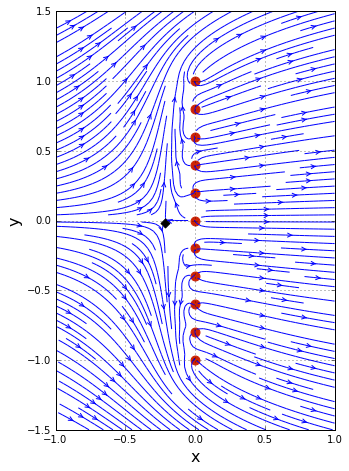

In [21]:
# plot the sources
size = 5
pyplot.figure(figsize=(size, (yz-ya)/(xz-xa)*size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.scatter(xsrc, ysrc, color='#CD2305', s=80, marker='o')

# plot the streamlines
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# compute the velocity magniture and indices of the stagnation point
# note: the stagnation point is approximated as the point with the smallest velocity magnitude
magnitude = numpy.sqrt(u**2 + v**2)
jstag, istag = numpy.unravel_index(magnitude.argmin(), magnitude.shape)
# plot the stagnation point
pyplot.scatter(x[istag], y[jstag], color='black', s=40, marker='D')
pyplot.xlim(xa, xz)
pyplot.ylim(ya, yz);

## Question

Now try to change the total strength of the sources. What is the minimal total source strength so that the dividing streamline (ψ = 0) encloses all the singularities?

In [22]:
print(integrate.quad(lambda x: x**2, 0.0, 1.0))

a = 3.0
print(integrate.quad(lambda x, a: a * x**2, 0.0, 1.0, args=a))
b = 2.0
print(integrate.quad(lambda x, a, b: a * b * x**2, 0.0, 1.0, args=(a, b)))

(0.33333333333333337, 3.700743415417189e-15)
(1.0, 1.1102230246251565e-14)
(2.0, 2.220446049250313e-14)


In [28]:
sigma = 2 * uinf
ymin, ymax = -1, 1

# create the anonymous functions
integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / (x**2 + (y - s)**2)

# create a dummy function to vectorize
def integration(x, y, integrand):
    return integrate.quad(integrand, ymin, ymax, args=(x, y))[0]

vec_integration = numpy.vectorize(integration)

# compute the velocity field generated by the source-sheet
usheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_u)
vsheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_v)

# superposition of the source-sheet to the uniform flow
u = ufs + usheet
v = vfs + vsheet

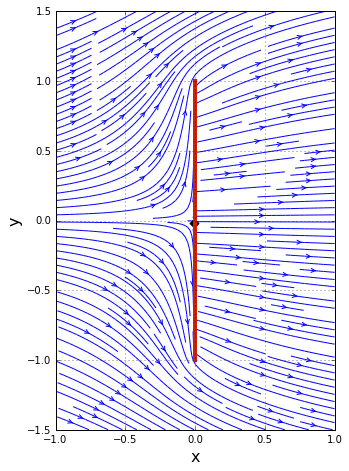

In [29]:
# plot the streamlines
size = 5
pyplot.figure(figsize=(size, (yz-ya)/(xz-xa)*size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# plot the source sheet
pyplot.axvline(0.0,
               (ymin-ya)/(yz-ya),
               (ymax-ya)/(yz-ya),
               color='#CD2305', linewidth=4)

# compute the velocity magniture and indices of the stagnation point
# note: the stagnation point is approximated as the point with the smallest velocity magnitude
magnitude = numpy.sqrt(u**2 + v**2)
jstagn, istagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

# plot the stagnation point
pyplot.scatter(x[istagn], y[jstagn],
               color='black', s=40, marker='D')
pyplot.xlim(xa, xz)
pyplot.ylim(ya, yz);